In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv("data/Alchool/student-mat.csv")

In [3]:
dados = dados.rename(columns={"age": "idade", "Medu": "EduMae", "Fedu":"EduPai", "traveltime":"tempoAteEscola",
                             "studytime":"horaEstudoSemanal", "failures":"reprovacoes", "famrel":"nivelRelacaoFamiliar",
                             "freetime":"tempoLivre", "goout":"saiComAmigos", "Dalc":"consumoDiaSemana", 
                              "Walc":"consumoFimDeSemana", "health":"saudeAtual", "absences":"faltas", 
                              "G1":"notaPrimeroPeriodo", "G2":"notaSegundoPeriodo", "G3":"notaTerceiroPeriodo",
                             "school":"escola", "sex":"sexo", "Mjob":"trabalhoMae", "Fjob": "trabalhoPai",
                             "address":"ondeMora", "famsize":"tamanhoFamilia", "Pstatus":"statusPai",
                             "Mstatus":"statusMae", "reason":"porqueEscolheuEscola", "guardian":"guarda",
                             "schoolsup":"ajudaExtraEdu", "famsup":"ajudaExtraFamilia", "paid":"aulasExtraPaga",
                             "activities":"extracurricular", "nursery":"foiAoMaternal", "higher":"querFaculdade",
                             "internet":"internetEmCasa", "romantic":"emRelacionamento"})

In [5]:
# pd.crosstab(dados['tamanhoFamilia'], dados['saiComAmigos'], margins=True, margins_name = 'Total')
# dados['Medu'].value_counts()/len(dados['Medu'])*100

In [11]:
dados_n = dados[["EduMae","EduPai","tempoAteEscola","horaEstudoSemanal","reprovacoes","nivelRelacaoFamiliar","tempoLivre","saiComAmigos","consumoDiaSemana","consumoFimDeSemana","saudeAtual","faltas","notaPrimeroPeriodo","notaSegundoPeriodo","notaTerceiroPeriodo"]].copy()

In [12]:
values = Normalizer().fit_transform(dados_n.values)
# dados_n.head()

dados_n.corr()
# dados_n.plot(kind="scatter", x="reprovacoes", y="horaEstudoSemanal", s=dados_n["EduMae"], c="EduPai", figsize=(10,7))

,EduMae,EduPai,tempoAteEscola,horaEstudoSemanal,reprovacoes,nivelRelacaoFamiliar,tempoLivre,saiComAmigos,consumoDiaSemana,consumoFimDeSemana,saudeAtual,faltas,notaPrimeroPeriodo,notaSegundoPeriodo,notaTerceiroPeriodo
EduMae,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
EduPai,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
tempoAteEscola,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
horaEstudoSemanal,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
reprovacoes,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
nivelRelacaoFamiliar,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
tempoLivre,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
saiComAmigos,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
consumoDiaSemana,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660
consumoFimDeSemana,-0.047123,-0.012631,0.134116,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,-0.126179,-0.084927,-0.051939


In [61]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [62]:
dados_n["clusters"] = y_pred

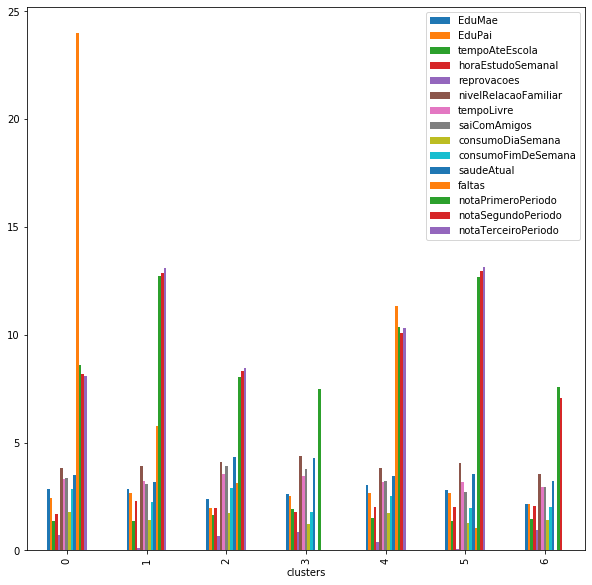

In [63]:
obj = dados_n.groupby("clusters").aggregate("mean")
# kmeans.cluster_centers_
obj.plot.bar(figsize=(10,10))

In [64]:
labels= kmeans.labels_
from sklearn import metrics
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')

In [65]:
silhouette

0.2073512156609667

In [66]:
dados.columns

Index(['escola', 'sexo', 'idade', 'ondeMora', 'tamanhoFamilia', 'statusPai',
       'EduMae', 'EduPai', 'trabalhoMae', 'trabalhoPai',
       'porqueEscolheuEscola', 'guarda', 'tempoAteEscola', 'horaEstudoSemanal',
       'reprovacoes', 'ajudaExtraEdu', 'ajudaExtraFamilia', 'aulasExtraPaga',
       'extracurricular', 'foiAoMaternal', 'querFaculdade', 'internetEmCasa',
       'emRelacionamento', 'nivelRelacaoFamiliar', 'tempoLivre',
       'saiComAmigos', 'consumoDiaSemana', 'consumoFimDeSemana', 'saudeAtual',
       'faltas', 'notaPrimeroPeriodo', 'notaSegundoPeriodo',
       'notaTerceiroPeriodo'],
      dtype='object')

In [67]:
kmeans.cluster_centers_

array([[ 1.04327283e-01,  8.99479702e-02,  4.86469944e-02,
         6.07431350e-02,  2.87691596e-02,  1.39587765e-01,
         1.27866906e-01,  1.29514903e-01,  6.82935077e-02,
         1.08748906e-01,  1.28644465e-01,  7.59113133e-01,
         3.03361164e-01,  2.87501845e-01,  2.86465305e-01],
       [ 1.15019239e-01,  1.07982099e-01,  5.70101488e-02,
         9.37773731e-02,  4.65389790e-03,  1.60704837e-01,
         1.31111975e-01,  1.26597158e-01,  5.69289960e-02,
         9.34773674e-02,  1.31081784e-01,  2.29836485e-01,
         5.05041656e-01,  5.14588422e-01,  5.23420745e-01],
       [ 1.32539377e-01,  1.10238842e-01,  9.21299144e-02,
         1.12043466e-01,  3.67653298e-02,  2.30719694e-01,
         1.98246432e-01,  2.17617821e-01,  9.53295647e-02,
         1.61345923e-01,  2.42272476e-01,  1.72905833e-01,
         4.46629855e-01,  4.62201809e-01,  4.69286492e-01],
       [ 2.10157468e-01,  1.97610023e-01,  1.54334133e-01,
         1.39646732e-01,  7.19898524e-02,  3.56686483

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(values)
visualizacao

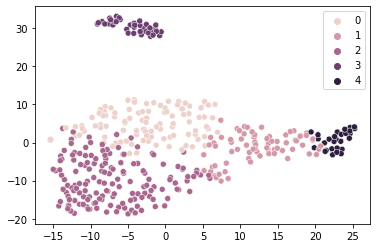

In [25]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], \
                hue=kmeans.labels_)

In [46]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [47]:
kmeans(20,values)

[20, 8.696024492539859]

In [48]:
resultado = [kmeans(numero_de_grupos,values) for numero_de_grupos in range(1,41)]
resultado

[[1, 55.83425862741217],
 [2, 37.01060140102817],
 [3, 23.590942745475147],
 [4, 19.424719877908338],
 [5, 16.618622238511506],
 [6, 14.743503426913719],
 [7, 13.534074510065931],
 [8, 12.741203840695015],
 [9, 11.960967182476095],
 [10, 11.49008681510827],
 [11, 11.138370520631517],
 [12, 10.771357450848322],
 [13, 10.412749846027847],
 [14, 10.129458677886543],
 [15, 9.816637285815041],
 [16, 9.541782130389425],
 [17, 9.300298421354384],
 [18, 9.110803441767157],
 [19, 8.947203448852445],
 [20, 8.703473981955371],
 [21, 8.531844814838008],
 [22, 8.361220233709426],
 [23, 8.246918588502679],
 [24, 8.12828111751674],
 [25, 7.943364635707113],
 [26, 7.797832568790326],
 [27, 7.714072013980438],
 [28, 7.519082844200435],
 [29, 7.4425591491293535],
 [30, 7.315983427467116],
 [31, 7.317497866969714],
 [32, 7.163845976442825],
 [33, 7.058639158484119],
 [34, 7.002931316186419],
 [35, 6.843505663934322],
 [36, 6.804924540915026],
 [37, 6.717270026150368],
 [38, 6.502864007087169],
 [39, 6.57

In [49]:
resultado = pd.DataFrame(resultado, columns=['nClusters','inertia'])

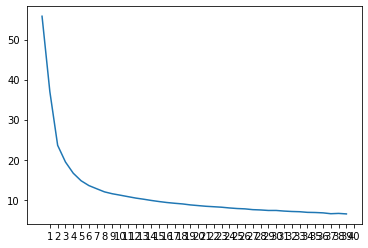

In [50]:
resultado.inertia.plot(xticks=resultado.nClusters)